# Training WideResNet on Cifar10 using DFW

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/DL_project/
!pwd

Mounted at /content/drive
/content/drive/MyDrive/DL_project
/content/drive/MyDrive/DL_project


In [ ]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.datasets import CIFAR100
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import *
import os
import time
import gc
import shutil
import h5py

from dfw.dfw import DFW
from dfw.dfw.losses import set_smoothing_enabled
from dfw.dfw.losses import MultiClassHingeLoss
from dfw.experiments.models.densenet import DenseNet3
from dfw.experiments.models.wide_resnet import WideResNet

from train_utils import *

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
os.makedirs("data/cifar", exist_ok=True)
train_dataset_10 = CIFAR10(root='data/cifar', download=True, transform=transform)
test_dataset_10 = CIFAR10(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_10), len(test_dataset_10))

train_dataset_100 = CIFAR100(root='data/cifar', download=True, transform=transform)
test_dataset_100 = CIFAR100(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_100), len(test_dataset_100))

Files already downloaded and verified
50000 10000
Files already downloaded and verified
50000 10000


In [ ]:
trainer = Net_Trainer(device, 'wrn', 'wrn_dfw_c10', train_dataset_10, test_dataset_10, lr=1.0, optm='dfw', 
                      loss='svm', batch_size=128, epochs=100, weight_decay=1e-4, smooth=True, mom=0.9)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)

cuda Tesla T4
Epoch:0   Loss:0.82   Val loss:1.323   Accuracy:46.549   Best val loss:1.323   Time taken:170.656
Epoch:1   Loss:0.567   Val loss:0.95   Accuracy:62.648   Best val loss:0.95   Time taken:170.26
Epoch:2   Loss:0.428   Val loss:0.825   Accuracy:68.305   Best val loss:0.825   Time taken:169.958
Epoch:3   Loss:0.359   Val loss:0.933   Accuracy:65.763   Best val loss:0.825   Time taken:169.937
Epoch:4   Loss:0.332   Val loss:0.581   Accuracy:76.978   Best val loss:0.581   Time taken:169.473
Epoch:5   Loss:0.304   Val loss:0.845   Accuracy:69.284   Best val loss:0.581   Time taken:169.655
Epoch:6   Loss:0.289   Val loss:1.012   Accuracy:64.132   Best val loss:0.581   Time taken:169.203
Epoch:7   Loss:0.28   Val loss:0.678   Accuracy:74.575   Best val loss:0.581   Time taken:169.273
Epoch:8   Loss:0.269   Val loss:0.637   Accuracy:76.859   Best val loss:0.581   Time taken:169.535
Epoch:9   Loss:0.261   Val loss:0.599   Accuracy:77.403   Best val loss:0.581   Time taken:169.614
E

In [ ]:
# Conitnue training by loading checkpoint
# Best epoch = epoch with least val loss
trainer = Net_Trainer(device, 'wrn', 'wrn_dfw_c10', train_dataset_10, test_dataset_10, load_ckpt='v1_ckpt_wrn_dfw_c10', lr=1.0, optm='dfw', loss='svm', batch_size=128, epochs=100, weight_decay=1e-4, smooth=True)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)

cuda Tesla T4
Epoch:69   Loss:0.002   Val loss:0.238   Accuracy:89.794   Best val loss:0.225   Time taken:161.225
Epoch:70   Loss:0.002   Val loss:0.233   Accuracy:89.962   Best val loss:0.225   Time taken:162.912
Epoch:71   Loss:0.003   Val loss:0.232   Accuracy:90.042   Best val loss:0.225   Time taken:162.638
Epoch:72   Loss:0.002   Val loss:0.232   Accuracy:90.101   Best val loss:0.225   Time taken:162.789
Epoch:73   Loss:0.002   Val loss:0.236   Accuracy:89.656   Best val loss:0.225   Time taken:162.737
Epoch:74   Loss:0.002   Val loss:0.237   Accuracy:89.557   Best val loss:0.225   Time taken:162.66
Epoch:75   Loss:0.002   Val loss:0.229   Accuracy:90.012   Best val loss:0.225   Time taken:162.738
Epoch:76   Loss:0.002   Val loss:0.233   Accuracy:89.775   Best val loss:0.225   Time taken:162.519
Epoch:77   Loss:0.002   Val loss:0.23   Accuracy:89.903   Best val loss:0.225   Time taken:162.603
Epoch:78   Loss:0.002   Val loss:0.234   Accuracy:89.389   Best val loss:0.225   Time ta

NameError: ignored

cuda Tesla T4


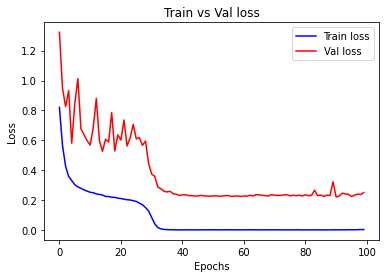

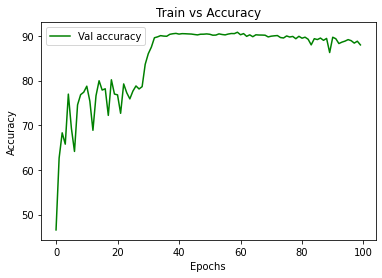

Best epoch: 90


In [ ]:
# Conitnue training by loading checkpoint
# Best epoch = epoch with least val loss
# This cell is used only to plot the graphs
trainer = Net_Trainer(device, 'wrn', 'wrn_dfw_c10', train_dataset_10, test_dataset_10, load_ckpt='v1_ckpt_wrn_dfw_c10', lr=1.0, optm='dfw', loss='svm', 
                      batch_size=128, epochs=100, weight_decay=1e-4, smooth=True)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)